In [1]:
## Testing was done in 7_plot.ipynb

import yt
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import json
import numpy as np
import os
import os.path
#from mycolorpy import colorlist as mcp
from unyt import erg, G, Msun, kpc


yt.enable_plugins()

yt : [INFO     ] 2023-01-26 13:16:57,691 Loading plugins from /home/dskinner6/.config/yt/my_plugins.py


In [2]:
import matplotlib

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
run_dir = '/home/dskinner6/localdata/SG64-2020/'
data_dir = '/home/dskinner6/localdata/SG64-2020/NSM_analysis/run_data/'
image_outputs = '/home/dskinner6/localdata/SG64-2020/frontera_analysis/images/NSM_restart/'

In [6]:
with open('run_DD_data.json') as f:
    DD_data = json.load(f)   
    
with open('old_dicts/halo_quantities.json') as f:
    halo_quantities = json.load(f)
    
with open('stellar_energy.json') as f:
    stellar_energy = json.load(f)
    
with open('old_dicts/star_info.json') as f:
    star_info = json.load(f)
    
with open('param_info.json') as f:
    param_info = json.load(f)

#with open('run_halos.json') as f:
#    run_halos = json.load(f)

file = open('run_halos_incl_vir.json', 'r')
run_halos = json.loads(file.read())

In [7]:
NSM_time = {}

for i, run_name in enumerate(halo_quantities):
    
    target_type = 1
    
    for j, ds in enumerate(star_info[run_name]):
        if star_info[run_name][ds]['star_info']['chosen_star']['type'] == target_type:
            target_type = -1
            NSM_time[run_name] = DD_data[run_name][ds]['time']
            break

In [8]:
NSM_time

{'run_A': 196.8399037829965,
 'run_B': 215.6173804743312,
 'run_D': 286.0331842311111,
 'run_E': 286.0332123982382,
 'run_fiducial': 286.03321049898926}

In [6]:
vary_energy = ['run_original', 'run_fiducial', 'run_D', 'run_E']
vary_time = ['run_original', 'run_fiducial', 'run_A', 'run_B']

In [7]:
## Binding energy U = 3GM^2 / (5*R)

def binding(m, r):
    U = 3*G*(m**2) / (5 * r)
    
    return U.to('erg')

In [8]:
del stellar_energy['run_data']

In [9]:
#  0 : HI
#  1 : HeI
#  2 : HeII
#  3 : Lyman-Werner (H2)

#run_name = 'run_A'

for h, run_name in enumerate(stellar_energy):
    for i, o in enumerate(stellar_energy[run_name]):
        o = str(o)
        P2_E0_tot = []
        P2_E1_tot = []
        P2_E2_tot = []
        P2_therm_tot = []

        P3_E0_tot = []
        P3_E1_tot = []
        P3_E2_tot = []
        P3_E3_tot = []
        P3_therm_tot = []

        P2 = stellar_energy[run_name][o]['P2']

        if len(P2) == 0:
            print('No P2 stars in this output.')

            P2_E0_tot.append(0)
            P2_E1_tot.append(0)
            P2_E2_tot.append(0)

            P2_therm_tot.append(0)

            pass
        else:
            P2_radiative = P2['radiative']

            P2_E0 = np.sum(P2_radiative[0])
            P2_E1 = np.sum(P2_radiative[1])
            P2_E2 = np.sum(P2_radiative[2])

            P2_thermal = np.sum(P2['thermal'])

            P2_E0_tot.append(P2_E0)
            P2_E1_tot.append(P2_E1)
            P2_E2_tot.append(P2_E2)

            P2_therm_tot.append(P2_thermal)

        P3 = stellar_energy[run_name][o]['P3']
        P3_radiative = P3['radiative']
        if len(P3_radiative[0]) == 0:
            print('No P3 stars in this output.')
            P3_E0_tot.append(0)
            P3_E1_tot.append(0)
            P3_E2_tot.append(0)
            P3_E3_tot.append(0)

            P3_therm_tot.append(0)

            pass
        else:
            P3_E0 = np.sum(P3_radiative[0])
            P3_E1 = np.sum(P3_radiative[1])
            P3_E2 = np.sum(P3_radiative[2])
            P3_E3 = np.sum(P3_radiative[3])

            P3_E0_tot.append(P3_E0)
            P3_E1_tot.append(P3_E1)
            P3_E2_tot.append(P3_E2)
            P3_E3_tot.append(P3_E3)

            P3_thermal = np.sum(P3['thermal'])

            P3_therm_tot.append(P3_thermal)
            
            
        P2_E0_tot = np.array(P2_E0_tot)
        P2_E1_tot = np.array(P2_E1_tot)
        P2_E2_tot = np.array(P2_E2_tot)
        P2_rad_tot = P2_E0_tot + P2_E1_tot + P2_E2_tot

        stellar_energy[run_name][o]['P2']['total_radiative'] = list(P2_rad_tot)  
        
        P2_therm_tot = np.array(P2_therm_tot)
        stellar_energy[run_name][o]['P2']['total_thermal'] = list(P2_therm_tot)
        
        P3_E0_tot = np.array(P3_E0_tot)
        P3_E1_tot = np.array(P3_E1_tot)
        P3_E2_tot = np.array(P3_E2_tot)
        P3_E3_tot = np.array(P3_E3_tot)
        P3_rad_tot = P3_E0_tot + P3_E1_tot + P3_E2_tot + P3_E3_tot

        stellar_energy[run_name][o]['P3']['total_radiative'] = list(P3_rad_tot)
        
        P3_therm_tot = np.array(P3_therm_tot)
        stellar_energy[run_name][o]['P3']['total_thermal'] = list(P3_therm_tot)

    ## Calculate binding energy  
    
    run_halos_outs = [out for out in run_halos[run_name].keys()]
    #binding_energy = []
    for i, out in enumerate(stellar_energy[run_name]):
        out = str(out)
        if out not in run_halos_outs:
            stellar_energy[run_name][out]['binding'] = int(0)
            #binding_energy.append(0)

        else:
            ds = yt.load(f'../{run_name}/DD{out}/output_{out}')

            m = ds.quan(run_halos[run_name][out]['mass'], 'Msun')
            r = ds.quan(run_halos[run_name][out]['rvir'], 'unitary').to('kpc')
            
            stellar_energy[run_name][out]['binding'] = binding(m,r).v.tolist()
            #binding_energy.append(binding(m, r))

    #binding_energy = np.array(binding_energy)
    
    ## Add to stellar energy dictionary
    #stellar_energy[run_name][o]['binding'] = list(binding_energy)

yt : [INFO     ] 2023-01-24 07:56:14,123 Parameters: current_time              = 22.745089719978
yt : [INFO     ] 2023-01-24 07:56:14,124 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:14,125 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:14,126 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:14,126 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:14,126 Parameters: current_redshift          = 26.205185090537
yt : [INFO     ] 2023-01-24 07:56:14,127 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:14,127 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:14,128 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:14,128 Parameters: hubble_constant           = 0.6766


No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.


yt : [INFO     ] 2023-01-24 07:56:14,254 Parameters: current_time              = 23.622229746859
yt : [INFO     ] 2023-01-24 07:56:14,255 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:14,256 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:14,256 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:14,257 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:14,257 Parameters: current_redshift          = 25.527466803273
yt : [INFO     ] 2023-01-24 07:56:14,258 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:14,258 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:14,258 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:14,258 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:14,326 Parameters: current_time              = 24.499369773757
yt 

yt : [INFO     ] 2023-01-24 07:56:14,900 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:14,901 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:14,901 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:14,902 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:14,902 Parameters: current_redshift          = 20.88835557169
yt : [INFO     ] 2023-01-24 07:56:14,902 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:14,902 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:14,903 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:14,903 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:14,968 Parameters: current_time              = 32.393617277821
yt : [INFO     ] 2023-01-24 07:56:14,969 Parameters: domain_dimensions         = [64 64 64]
yt : [INF

yt : [INFO     ] 2023-01-24 07:56:15,524 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:15,524 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:15,524 Parameters: current_redshift          = 17.857731321076
yt : [INFO     ] 2023-01-24 07:56:15,525 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:15,525 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:15,525 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:15,525 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:15,592 Parameters: current_time              = 40.28792827704
yt : [INFO     ] 2023-01-24 07:56:15,592 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:15,593 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:15,593 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INF

yt : [INFO     ] 2023-01-24 07:56:16,151 Parameters: current_redshift          = 15.493037151052
yt : [INFO     ] 2023-01-24 07:56:16,152 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:16,152 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:16,152 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:16,152 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:16,219 Parameters: current_time              = 47.305048865652
yt : [INFO     ] 2023-01-24 07:56:16,220 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:16,220 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:16,221 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:16,221 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:16,221 Parameters: current_redshift          = 15.696322573864
yt 

yt : [INFO     ] 2023-01-24 07:56:16,777 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:16,777 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:16,777 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:16,778 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:16,844 Parameters: current_time              = 56.076477919485
yt : [INFO     ] 2023-01-24 07:56:16,845 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:16,846 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:16,846 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:16,846 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:16,847 Parameters: current_redshift          = 13.906054501543
yt : [INFO     ] 2023-01-24 07:56:16,847 Parameters: omega_lambda              = 0.6889
yt : [INFO  

yt : [INFO     ] 2023-01-24 07:56:17,404 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:17,404 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:17,471 Parameters: current_time              = 63.970744425641
yt : [INFO     ] 2023-01-24 07:56:17,472 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:17,472 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:17,473 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:17,473 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:17,473 Parameters: current_redshift          = 12.652720771176
yt : [INFO     ] 2023-01-24 07:56:17,473 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:17,474 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:17,474 Parameters: omega_radiation           = 0
yt : [INFO     ] 

yt : [INFO     ] 2023-01-24 07:56:18,103 Parameters: current_time              = 71.865040198989
yt : [INFO     ] 2023-01-24 07:56:18,103 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:18,104 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:18,105 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:18,105 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:18,105 Parameters: current_redshift          = 11.633315864781
yt : [INFO     ] 2023-01-24 07:56:18,106 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:18,106 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:18,106 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:18,106 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:18,176 Parameters: current_time              = 72.742147582731
yt 

yt : [INFO     ] 2023-01-24 07:56:18,758 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:18,758 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:18,759 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:18,759 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:18,760 Parameters: current_redshift          = 10.784992530362
yt : [INFO     ] 2023-01-24 07:56:18,760 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:18,760 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:18,760 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:18,760 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:18,827 Parameters: current_time              = 80.636430381972
yt : [INFO     ] 2023-01-24 07:56:18,828 Parameters: domain_dimensions         = [64 64 64]
yt : [IN

yt : [INFO     ] 2023-01-24 07:56:19,379 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:19,379 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:19,379 Parameters: current_redshift          = 10.065986817468
yt : [INFO     ] 2023-01-24 07:56:19,380 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:19,380 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:19,380 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:19,381 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:19,446 Parameters: current_time              = 88.44306507624
yt : [INFO     ] 2023-01-24 07:56:19,447 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:19,447 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:19,448 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INF

No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P3 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.
No P2 stars in this output.


yt : [INFO     ] 2023-01-24 07:56:19,724 Parameters: current_time              = 25.376509800672
yt : [INFO     ] 2023-01-24 07:56:19,725 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:19,725 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:19,726 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:19,726 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:19,727 Parameters: current_redshift          = 24.290314607147
yt : [INFO     ] 2023-01-24 07:56:19,727 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:19,727 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:19,727 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:19,727 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:19,791 Parameters: current_time              = 26.253649827605
yt 

yt : [INFO     ] 2023-01-24 07:56:20,335 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-24 07:56:20,335 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 07:56:20,336 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 07:56:20,336 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 07:56:20,336 Parameters: current_redshift          = 20.111978616284
yt : [INFO     ] 2023-01-24 07:56:20,336 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-24 07:56:20,336 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-24 07:56:20,337 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-24 07:56:20,337 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-24 07:56:20,403 Parameters: current_time              = 34.147905588928
yt : [INFO     ] 2023-01-24 07:56:20,403 Parameters: domain_dimensions         = [64 64 64]
yt : [IN

KeyboardInterrupt: 

In [11]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
#json.dumps(stellar_energy, cls=NpEncoder)

file = open('stellar_energy_totals.json', 'w')

file.write(json.dumps(stellar_energy, cls=NpEncoder))

1808551

In [9]:
file = open('stellar_energy_totals.json', 'r')

stellar_energy = json.loads(file.read())

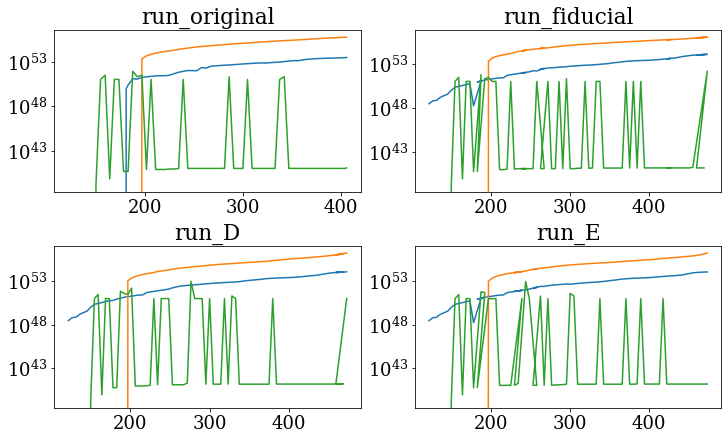

In [11]:
## Energy
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)
ax = axs.flat

for i, run_name in enumerate(vary_energy):
    if run_name != 'run_original':
            run_label = param_info[run_name]['energy'] + ' erg'
    else:
        run_label = 'CCSN'
        
    time = []
    P2_rad_tot = []
    P2_therm_tot = []
    P3_rad_tot = []
    P3_therm_tot = []
    binding_tot = []
    
    for j, o in enumerate(stellar_energy[run_name]):
        time.append(DD_data[run_name][o]['time'])
        P2 = stellar_energy[run_name][o]['P2']
        P3 = stellar_energy[run_name][o]['P3']
        binding = stellar_energy[run_name][o]['binding']
        binding_tot.append(binding)

        P2_rad_tot.append(P2['total_radiative'][0])
        P2_therm_tot.append(P2['total_thermal'][0])
        
        P3_rad_tot.append(P3['total_radiative'][0])
        P3_therm_tot.append(P3['total_thermal'][0])
        
    time = np.array(time)
    P2_rad_tot = np.array(P2_rad_tot)
    P2_therm_tot = np.array(P2_therm_tot)
    P3_rad_tot = np.array(P3_rad_tot)
    P3_therm_tot = np.array(P3_therm_tot)
    binding_tot = np.array(binding_tot)
    
    ax[i].plot(time, binding_tot, label = "Binding Energy")
    ax[i].plot(time, P2_rad_tot + P2_therm_tot, label = "P2")
    ax[i].plot(time, P3_rad_tot + P3_therm_tot, label = "P3")
    ax[i].set_yscale('log')
    ax[i].set_title(run_name)
    
    

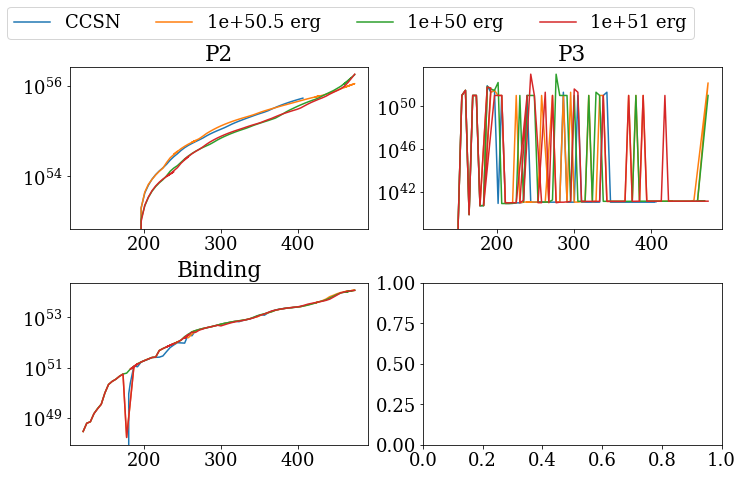

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)
ax = axs.flat

for i, run_name in enumerate(vary_energy):
    if run_name != 'run_original':
            run_label = param_info[run_name]['energy'] + ' erg'
    else:
        run_label = 'CCSN'
        
    time = []
    P2_rad_tot = []
    P2_therm_tot = []
    P3_rad_tot = []
    P3_therm_tot = []
    binding_tot = []
    
    for j, o in enumerate(stellar_energy[run_name]):
        time.append(DD_data[run_name][o]['time'])
        P2 = stellar_energy[run_name][o]['P2']
        P3 = stellar_energy[run_name][o]['P3']
        binding = stellar_energy[run_name][o]['binding']
        binding_tot.append(binding)

        P2_rad_tot.append(P2['total_radiative'][0])
        P2_therm_tot.append(P2['total_thermal'][0])
        
        P3_rad_tot.append(P3['total_radiative'][0])
        P3_therm_tot.append(P3['total_thermal'][0])
        
    time = np.array(time)
    P2_rad_tot = np.array(P2_rad_tot)
    P2_therm_tot = np.array(P2_therm_tot)
    P3_rad_tot = np.array(P3_rad_tot)
    P3_therm_tot = np.array(P3_therm_tot)
    binding_tot = np.array(binding_tot)
    
    
    ax[0].plot(time, P2_rad_tot + P2_therm_tot, label = run_label)
    ax[0].set_title('P2')
    ax[0].set_yscale('log')
    
    ax[1].plot(time, P3_rad_tot + P3_therm_tot)
    ax[1].set_title('P3')
    ax[1].set_yscale('log')
    
    ax[2].plot(time, binding_tot)
    ax[2].set_title('Binding')
    ax[2].set_yscale('log')

fig.legend(bbox_to_anchor=(0.95, 1.1), ncol = 4)

In [49]:
time_og = []
P2_rad_og = []
P2_therm_og = []

for j, o in enumerate(stellar_energy['run_original']):
    time_og.append(DD_data['run_original'][o]['time'])
    P2 = stellar_energy['run_original'][o]['P2']

    P2_rad_og.append(P2['total_radiative'][0])
    P2_therm_og.append(P2['total_thermal'][0])

time_og = np.array(time_og)
P2_rad_og = np.array(P2_rad_og)
P2_therm_og = np.array(P2_therm_og)
P2_og = P2_rad_og + P2_therm_og


time_D = []
P2_rad_D = []
P2_therm_D = []

for j, o in enumerate(stellar_energy['run_D']):
    time_D.append(DD_data['run_D'][o]['time'])
    P2 = stellar_energy['run_D'][o]['P2']

    P2_rad_D.append(P2['total_radiative'][0])
    P2_therm_D.append(P2['total_thermal'][0])

time_D = np.array(time_D)
P2_rad_D = np.array(P2_rad_D)
P2_therm_D = np.array(P2_therm_D)
P2_D = P2_rad_D + P2_therm_D

time_E = []
P2_rad_E = []
P2_therm_E = []

for j, o in enumerate(stellar_energy['run_E']):
    time_E.append(DD_data['run_E'][o]['time'])
    P2 = stellar_energy['run_E'][o]['P2']

    P2_rad_E.append(P2['total_radiative'][0])
    P2_therm_E.append(P2['total_thermal'][0])

time_E = np.array(time_E)
P2_rad_E = np.array(P2_rad_E)
P2_therm_E = np.array(P2_therm_E)
P2_E = P2_rad_E + P2_therm_E

time_fiducial = []
P2_rad_fiducial = []
P2_therm_fiducial = []

for j, o in enumerate(stellar_energy['run_fiducial']):
    time_fiducial.append(DD_data['run_fiducial'][o]['time'])
    P2 = stellar_energy['run_fiducial'][o]['P2']

    P2_rad_fiducial.append(P2['total_radiative'][0])
    P2_therm_fiducial.append(P2['total_thermal'][0])

time_fiducial = np.array(time_fiducial)
P2_rad_fiducial = np.array(P2_rad_fiducial)
P2_therm_fiducial = np.array(P2_therm_fiducial)
P2_fiducial = P2_rad_fiducial + P2_therm_fiducial

In [21]:
time_array = np.linspace(time_og[0], time_og[-1], 100)
time_array

array([121.72971096, 124.60324338, 127.4767758 , 130.35030822,
       133.22384064, 136.09737306, 138.97090548, 141.84443791,
       144.71797033, 147.59150275, 150.46503517, 153.33856759,
       156.21210001, 159.08563243, 161.95916485, 164.83269727,
       167.7062297 , 170.57976212, 173.45329454, 176.32682696,
       179.20035938, 182.0738918 , 184.94742422, 187.82095664,
       190.69448906, 193.56802149, 196.44155391, 199.31508633,
       202.18861875, 205.06215117, 207.93568359, 210.80921601,
       213.68274843, 216.55628085, 219.42981328, 222.3033457 ,
       225.17687812, 228.05041054, 230.92394296, 233.79747538,
       236.6710078 , 239.54454022, 242.41807264, 245.29160507,
       248.16513749, 251.03866991, 253.91220233, 256.78573475,
       259.65926717, 262.53279959, 265.40633201, 268.27986443,
       271.15339686, 274.02692928, 276.9004617 , 279.77399412,
       282.64752654, 285.52105896, 288.39459138, 291.2681238 ,
       294.14165623, 297.01518865, 299.88872107, 302.76

In [51]:
time_D = time_D[np.argwhere(time_D < time_og[-1]).T[0]]
P2_D = P2_D[np.argwhere(time_D < time_og[-1]).T[0]]

time_E = time_E[np.argwhere(time_E < time_og[-1]).T[0]]
P2_E = P2_E[np.argwhere(time_E < time_og[-1]).T[0]]

time_fiducial = time_fiducial[np.argwhere(time_fiducial < time_og[-1]).T[0]]
P2_fiducial = P2_fiducial[np.argwhere(time_fiducial < time_og[-1]).T[0]]

In [53]:
P2_og_interp = np.interp(time_array, time_og, P2_og)
P2_D_interp = np.interp(time_array, time_D, P2_D)
P2_E_interp = np.interp(time_array, time_E, P2_E)
P2_fiducial_interp = np.interp(time_array, time_fiducial, P2_fiducial)

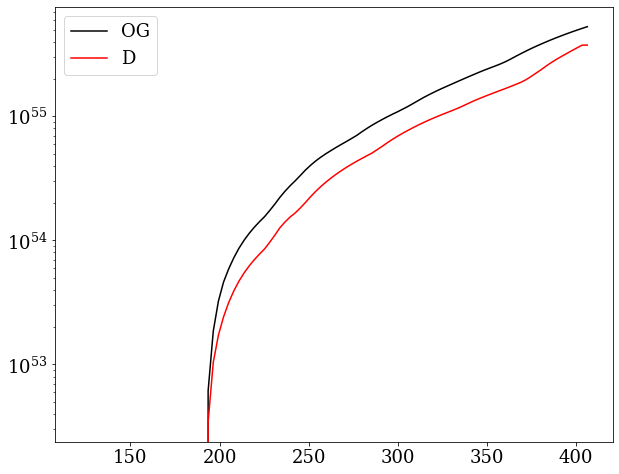

In [38]:
fig = plt.figure(figsize = (10, 8))

plt.plot(time_array, P2_og_interp, color = 'black', label = 'OG')
plt.plot(time_array, P2_D_interp, color = 'red', label = 'D')
plt.yscale('log')

plt.legend()

/tmp/ipykernel_10342/795097242.py:1: RuntimeWarning: invalid value encountered in true_divide
  resid_D = (P2_D_interp - P2_og_interp) / P2_og_interp
/tmp/ipykernel_10342/795097242.py:2: RuntimeWarning: invalid value encountered in true_divide
  resid_E = (P2_E_interp - P2_og_interp) / P2_og_interp
/tmp/ipykernel_10342/795097242.py:3: RuntimeWarning: invalid value encountered in true_divide
  resid_fiducial = (P2_fiducial_interp - P2_og_interp) / P2_og_interp


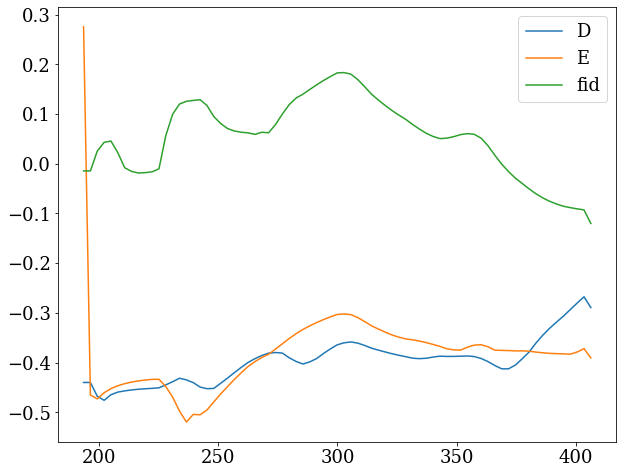

In [57]:
resid_D = (P2_D_interp - P2_og_interp) / P2_og_interp
resid_E = (P2_E_interp - P2_og_interp) / P2_og_interp
resid_fiducial = (P2_fiducial_interp - P2_og_interp) / P2_og_interp

fig = plt.figure(figsize = (10, 8))
plt.plot(time_array, resid_D, label = 'D')
plt.plot(time_array, resid_E, label = 'E')
plt.plot(time_array, resid_fiducial, label = 'fid')
plt.legend()

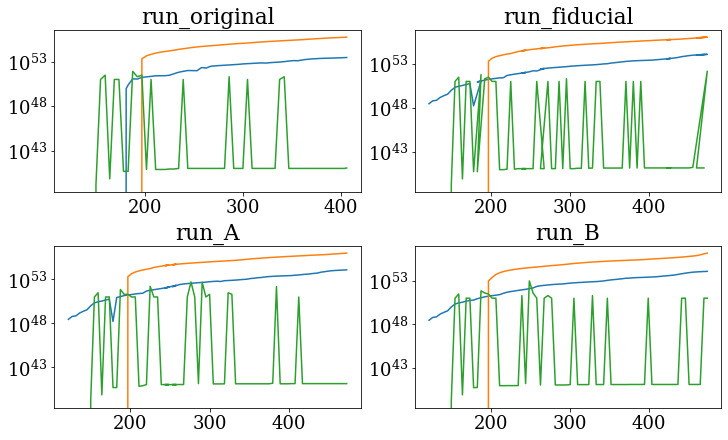

In [15]:
## Time
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)
ax = axs.flat

for i, run_name in enumerate(vary_time):
    if run_name != 'run_original':
            run_label = param_info[run_name]['delay_time'] + ' Myr'
    else:
        run_label = 'CCSN'
        
    time = []
    P2_rad_tot = []
    P2_therm_tot = []
    P3_rad_tot = []
    P3_therm_tot = []
    binding_tot = []
    
    for j, o in enumerate(stellar_energy[run_name]):
        time.append(DD_data[run_name][o]['time'])
        P2 = stellar_energy[run_name][o]['P2']
        P3 = stellar_energy[run_name][o]['P3']
        binding = stellar_energy[run_name][o]['binding']
        binding_tot.append(binding)

        P2_rad_tot.append(P2['total_radiative'][0])
        P2_therm_tot.append(P2['total_thermal'][0])
        
        P3_rad_tot.append(P3['total_radiative'][0])
        P3_therm_tot.append(P3['total_thermal'][0])
        
    time = np.array(time)
    P2_rad_tot = np.array(P2_rad_tot)
    P2_therm_tot = np.array(P2_therm_tot)
    P3_rad_tot = np.array(P3_rad_tot)
    P3_therm_tot = np.array(P3_therm_tot)
    binding_tot = np.array(binding_tot)
    
    ax[i].plot(time, binding_tot, label = "Binding Energy")
    ax[i].plot(time, P2_rad_tot + P2_therm_tot, label = "P2")
    ax[i].plot(time, P3_rad_tot + P3_therm_tot, label = "P3")
    ax[i].set_yscale('log')
    ax[i].set_title(run_name)

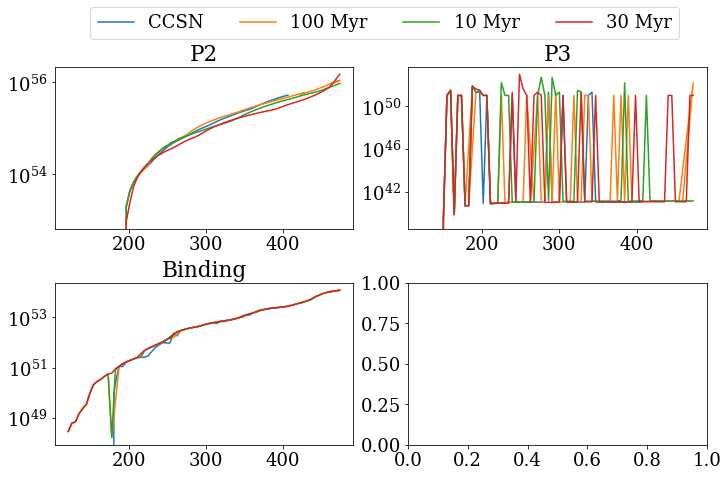

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)
ax = axs.flat

for i, run_name in enumerate(vary_time):
    if run_name != 'run_original':
            run_label = param_info[run_name]['delay_time'] + ' Myr'
    else:
        run_label = 'CCSN'
        
    time = []
    P2_rad_tot = []
    P2_therm_tot = []
    P3_rad_tot = []
    P3_therm_tot = []
    binding_tot = []
    
    for j, o in enumerate(stellar_energy[run_name]):
        time.append(DD_data[run_name][o]['time'])
        P2 = stellar_energy[run_name][o]['P2']
        P3 = stellar_energy[run_name][o]['P3']
        binding = stellar_energy[run_name][o]['binding']
        binding_tot.append(binding)

        P2_rad_tot.append(P2['total_radiative'][0])
        P2_therm_tot.append(P2['total_thermal'][0])
        
        P3_rad_tot.append(P3['total_radiative'][0])
        P3_therm_tot.append(P3['total_thermal'][0])
        
    time = np.array(time)
    P2_rad_tot = np.array(P2_rad_tot)
    P2_therm_tot = np.array(P2_therm_tot)
    P3_rad_tot = np.array(P3_rad_tot)
    P3_therm_tot = np.array(P3_therm_tot)
    binding_tot = np.array(binding_tot)
    
    
    ax[0].plot(time, P2_rad_tot + P2_therm_tot, label = run_label)
    ax[0].set_title('P2')
    ax[0].set_yscale('log')
    
    ax[1].plot(time, P3_rad_tot + P3_therm_tot)
    ax[1].set_title('P3')
    ax[1].set_yscale('log')
    
    ax[2].plot(time, binding_tot)
    ax[2].set_title('Binding')
    ax[2].set_yscale('log')

fig.legend(bbox_to_anchor=(0.95, 1.1), ncol = 4)

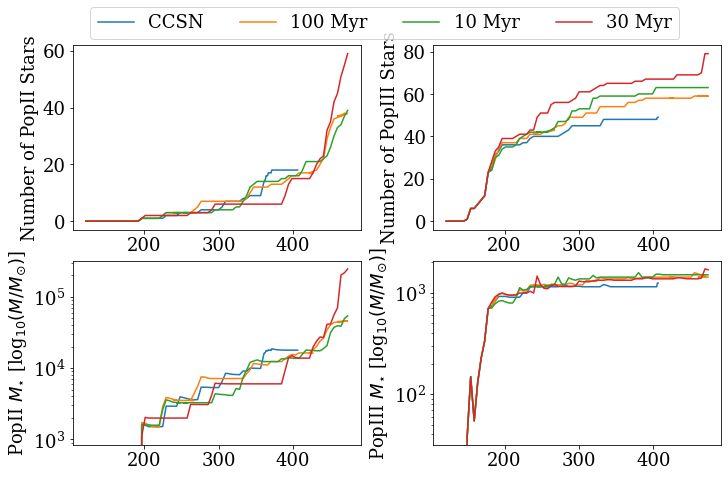

In [16]:
## How many Pop III stars, Pop II stars and their masses in the halo 

fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)
ax = axs.flat

for i, run_name in enumerate(vary_time):
    if run_name != 'run_original':
            run_label = param_info[run_name]['delay_time'] + ' Myr'
    else:
        run_label = 'CCSN'
        
    time = []
    P2_num = []
    P2_mass = []
    P3_num = []
    P3_mass = []
    
    for j, o in enumerate(star_info[run_name]):
        time.append(DD_data[run_name][o]['time'])
        P2 = star_info[run_name][o]['star_info']['P2']
        if len(P2) == 0:
            P2_num.append(0)
            P2_mass.append(0)
        else:
            
            if 'NSM_metallicity_fraction' in P2.keys():
                if len(P2['NSM_metallicity_fraction']) == 0:
                    P2_num.append(0)
                    P2_mass.append(0)
                else:
                    num_P2 = len(P2['id'])
                    mass_P2 = np.sum(P2['mass'])

                    P2_num.append(num_P2)
                    P2_mass.append(mass_P2)
            else:
                num_P2 = len(P2['id'])
                mass_P2 = np.sum(P2['mass'])

                P2_num.append(num_P2)
                P2_mass.append(mass_P2)
        
        P3 = star_info[run_name][o]['star_info']['P3']
        if len(P3['mass']) == 0:
            P3_num.append(0)
            P3_mass.append(0)
        else:
            num_P3 = len(P3['id'])
            mass_P3 = np.sum(P3['mass'])
            
            P3_num.append(num_P3)
            P3_mass.append(mass_P3)
    
    time = np.array(time)
    P2_num = np.array(P2_num)
    P2_mass = np.array(P2_mass)
    P3_num = np.array(P3_num)
    P3_mass = np.array(P3_mass)

    ax[0].plot(time, P2_num, label = run_label)
    ax[0].set_ylabel('Number of PopII Stars')
    ax[1].plot(time, P3_num)
    ax[1].set_ylabel('Number of PopIII Stars')
    ax[2].plot(time, P2_mass)
    ax[2].set_ylabel(r'PopII $M_{\star}$ [log$_{10}(M/M_{\odot})$]')
    ax[2].set_yscale('log')
    ax[3].plot(time, P3_mass)
    ax[3].set_ylabel(r'PopIII $M_{\star}$ [log$_{10}(M/M_{\odot})$]')
    ax[3].set_yscale('log')

fig.legend(bbox_to_anchor=(0.95, 1.1), ncol = 4)

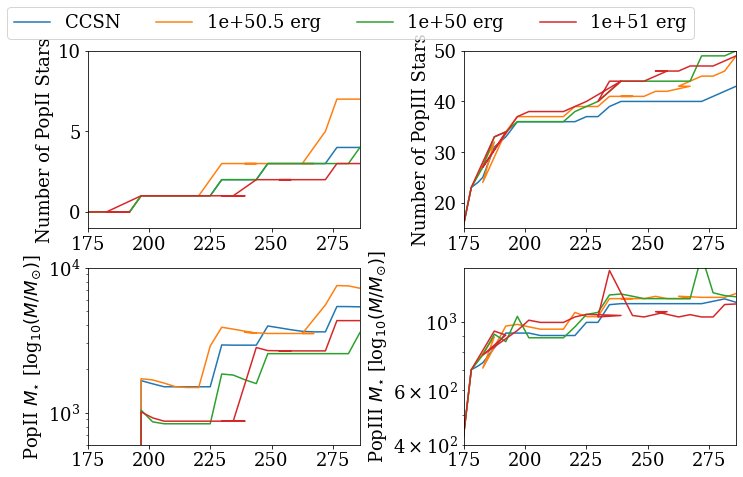

In [78]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)
ax = axs.flat

for i, run_name in enumerate(vary_energy):
    if run_name != 'run_original':
            run_label = param_info[run_name]['energy'] + ' erg'
    else:
        run_label = 'CCSN'
        
    time = []
    P2_num = []
    P2_mass = []
    P3_num = []
    P3_mass = []
    
    for j, o in enumerate(star_info[run_name]):
        time.append(DD_data[run_name][o]['time'])
        P2 = star_info[run_name][o]['star_info']['P2']
        if len(P2) == 0:
            P2_num.append(0)
            P2_mass.append(0)
        else:
            
            if 'NSM_metallicity_fraction' in P2.keys():
                if len(P2['NSM_metallicity_fraction']) == 0:
                    P2_num.append(0)
                    P2_mass.append(0)
                else:
                    num_P2 = len(P2['id'])
                    mass_P2 = np.sum(P2['mass'])

                    P2_num.append(num_P2)
                    P2_mass.append(mass_P2)
            else:
                num_P2 = len(P2['id'])
                mass_P2 = np.sum(P2['mass'])

                P2_num.append(num_P2)
                P2_mass.append(mass_P2)
        
        P3 = star_info[run_name][o]['star_info']['P3']
        if len(P3['mass']) == 0:
            P3_num.append(0)
            P3_mass.append(0)
        else:
            num_P3 = len(P3['id'])
            mass_P3 = np.sum(P3['mass'])
            
            P3_num.append(num_P3)
            P3_mass.append(mass_P3)
    
    time = np.array(time)
    P2_num = np.array(P2_num)
    P2_mass = np.array(P2_mass)
    P3_num = np.array(P3_num)
    P3_mass = np.array(P3_mass)

    ax[0].plot(time, P2_num, label = run_label)
    ax[0].set_ylabel('Number of PopII Stars')
    ax[0].set_xlim(175, 286)
    ax[0].set_ylim(-1, 10)
    ax[1].plot(time, P3_num)
    ax[1].set_ylabel('Number of PopIII Stars')
    ax[1].set_xlim(175, 286)
    ax[1].set_ylim(15, 50)
    ax[2].plot(time, P2_mass)
    ax[2].set_ylabel(r'PopII $M_{\star}$ [log$_{10}(M/M_{\odot})$]')
    ax[2].set_yscale('log')
    ax[2].set_xlim(175, 286)
    ax[2].set_ylim(6e2, 1e4)
    ax[3].plot(time, P3_mass)
    ax[3].set_ylabel(r'PopIII $M_{\star}$ [log$_{10}(M/M_{\odot})$]')
    ax[3].set_yscale('log')
    ax[3].set_xlim(175, 286)
    ax[3].set_ylim(4e2, 1.5e3)

fig.legend(bbox_to_anchor=(0.95, 1.1), ncol = 4)

In [20]:
run_halos['run_A']['0025']['T/|U|']

0.705299973487854

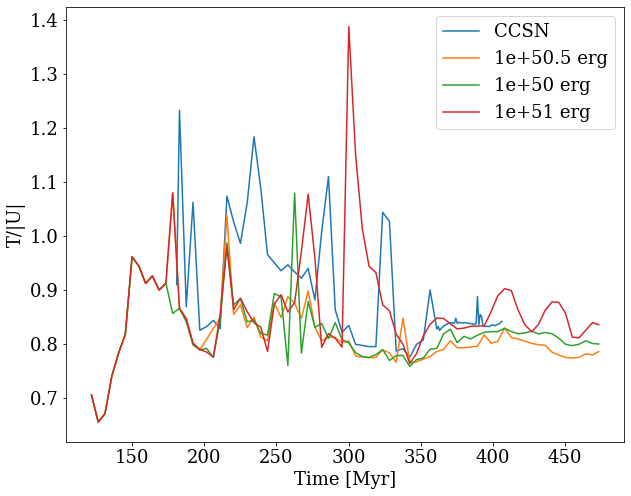

In [24]:
fig = plt.figure(figsize = (10, 8))
for i, run_name in enumerate(vary_energy):
    if run_name != 'run_original':
            run_label = param_info[run_name]['energy'] + ' erg'
    else:
        run_label = 'CCSN'
        
    vir_ratio = []
    time = []
    for j, o in enumerate(run_halos[run_name]):
        vir_ratio.append(run_halos[run_name][o]['T/|U|'])
        time.append(DD_data[run_name][o]['time'])
    
    vir_ratio = np.array(vir_ratio)
    time = np.array(time)
    
    plt.plot(time, vir_ratio, label = run_label)

plt.xlabel('Time [Myr]')
plt.ylabel('T/|U|')
#plt.yscale('log')
plt.legend()

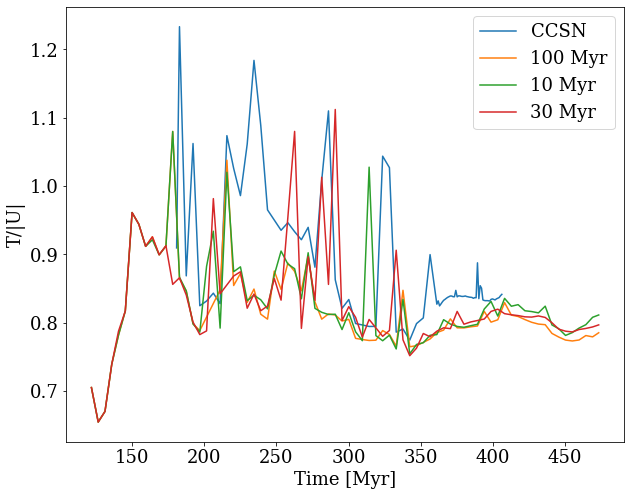

In [25]:
fig = plt.figure(figsize = (10, 8))
for i, run_name in enumerate(vary_time):
    if run_name != 'run_original':
            run_label = param_info[run_name]['delay_time'] + ' Myr'
    else:
        run_label = 'CCSN'
        
    vir_ratio = []
    time = []
    for j, o in enumerate(run_halos[run_name]):
        vir_ratio.append(run_halos[run_name][o]['T/|U|'])
        time.append(DD_data[run_name][o]['time'])
    
    vir_ratio = np.array(vir_ratio)
    time = np.array(time)
    
    plt.plot(time, vir_ratio, label = run_label)

plt.xlabel('Time [Myr]')
plt.ylabel('T/|U|')
#plt.yscale('log')
plt.legend()

In [39]:
with open('unit_conversion.json') as f:
    units = json.load(f)

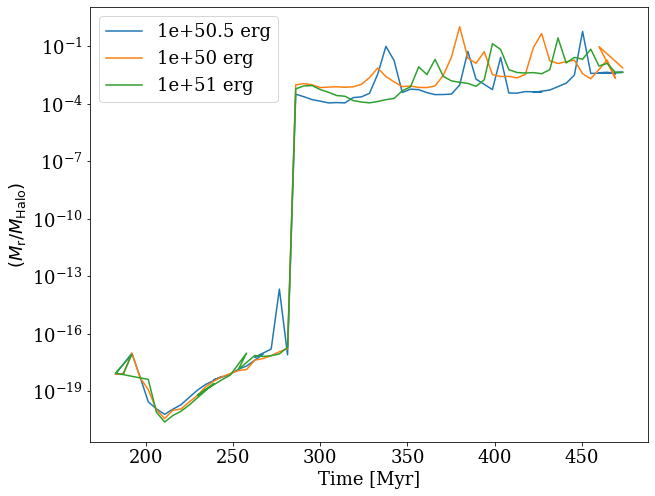

In [76]:
r_field = 'total_NSMRProcess'

fig = plt.figure(figsize = (10, 8))
for i, run_name in enumerate(vary_energy[1::]):
    if run_name != 'run_original':
            run_label = param_info[run_name]['energy'] + ' erg'
    else:
        run_label = 'CCSN'
        
    total_r = []
    time = []
    mhalo = []
    
    for j, o in enumerate(halo_quantities[run_name]):
        field_present = r_field in list(halo_quantities[run_name][o].keys())
        if field_present == True:
            time.append(DD_data[run_name][o]['time'])
            mhalo.append(run_halos[run_name][o]['mass'])
            
            r = halo_quantities[run_name][o][r_field]['none'] * g / cm**3 
            rvir = (run_halos[run_name][o]['rvir'] * units[run_name][o]['length']) * kpc
            volume = (4/3) * np.pi * rvir**3
            
            r_mass = (r * volume).to('Msun')
            total_r.append(r_mass)
        
    total_r = np.array(total_r)
    time = np.array(time)
    mhalo = np.array(mhalo)
    
    plt.plot(time, total_r  / mhalo, label = run_label)

plt.yscale('log')
plt.ylabel(r'$(M_{\mathrm{r}} / M_{\mathrm{Halo}})$')
plt.xlabel('Time [Myr]')
plt.legend()

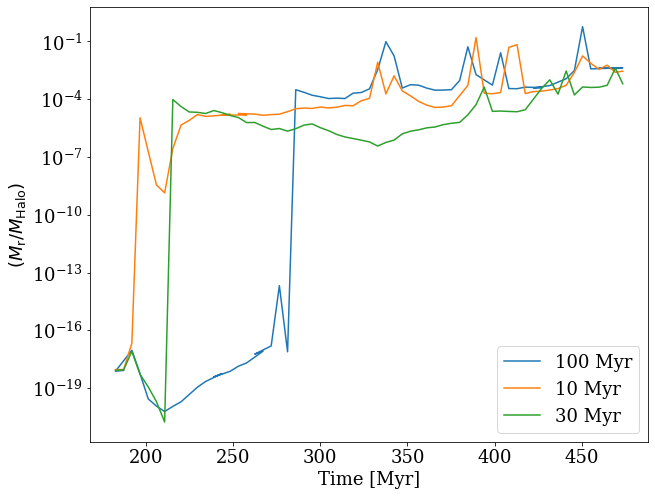

In [77]:
r_field = 'total_NSMRProcess'

fig = plt.figure(figsize = (10, 8))
for i, run_name in enumerate(vary_time[1::]):
    if run_name != 'run_original':
            run_label = param_info[run_name]['delay_time'] + ' Myr'
    else:
        run_label = 'CCSN'
        
    total_r = []
    time = []
    mhalo = []
    
    for j, o in enumerate(halo_quantities[run_name]):
        field_present = r_field in list(halo_quantities[run_name][o].keys())
        if field_present == True:
            time.append(DD_data[run_name][o]['time'])
            mhalo.append(run_halos[run_name][o]['mass'])
            
            r = halo_quantities[run_name][o][r_field]['none'] * g / cm**3 
            rvir = (run_halos[run_name][o]['rvir'] * units[run_name][o]['length']) * kpc
            volume = (4/3) * np.pi * rvir**3
            
            r_mass = (r * volume).to('Msun')
            total_r.append(r_mass)
        
    total_r = np.array(total_r)
    time = np.array(time)
    mhalo = np.array(mhalo)
    
    plt.plot(time, total_r  / mhalo, label = run_label)

plt.yscale('log')
plt.ylabel(r'$(M_{\mathrm{r}} / M_{\mathrm{Halo}})$')
plt.xlabel('Time [Myr]')
plt.legend()

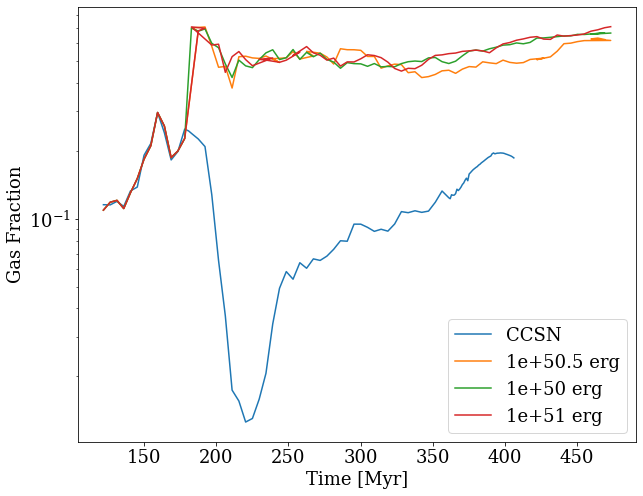

In [84]:
field = 'gas_fraction'

fig = plt.figure(figsize = (10, 8))
for i, run_name in enumerate(vary_energy):
    if run_name != 'run_original':
            run_label = param_info[run_name]['energy'] + ' erg'
    else:
        run_label = 'CCSN'
        
    total_f = []
    time = []
    mhalo = []
    
    for j, o in enumerate(halo_quantities[run_name]):
        field_present = field in list(halo_quantities[run_name][o].keys())
        if field_present == True:
            time.append(DD_data[run_name][o]['time'])
            
            f = halo_quantities[run_name][o][field]['cell_mass']
            
            total_f.append(f)
        
    total_f = np.array(total_f)
    time = np.array(time)
    mhalo = np.array(mhalo)
    
    plt.plot(time, total_f, label = run_label)

plt.yscale('log')
plt.ylabel('Gas Fraction')
plt.xlabel('Time [Myr]')
plt.legend()

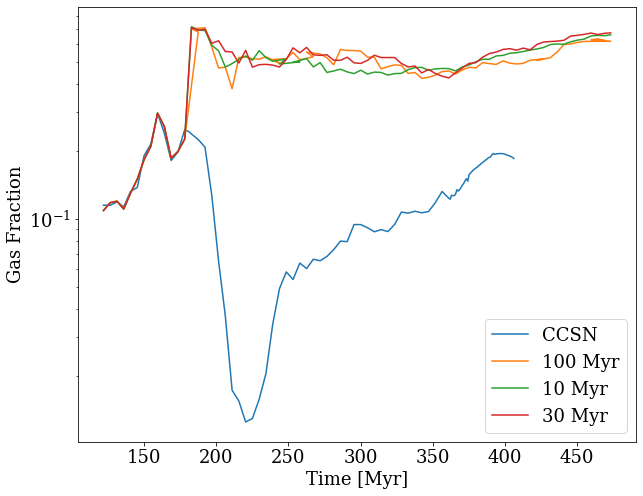

In [85]:
field = 'gas_fraction'

fig = plt.figure(figsize = (10, 8))
for i, run_name in enumerate(vary_time):
    if run_name != 'run_original':
            run_label = param_info[run_name]['delay_time'] + ' Myr'
    else:
        run_label = 'CCSN'
        
    total_f = []
    time = []
    mhalo = []
    
    for j, o in enumerate(halo_quantities[run_name]):
        field_present = field in list(halo_quantities[run_name][o].keys())
        if field_present == True:
            time.append(DD_data[run_name][o]['time'])
            
            f = halo_quantities[run_name][o][field]['cell_mass']
            
            total_f.append(f)
        
    total_f = np.array(total_f)
    time = np.array(time)
    mhalo = np.array(mhalo)
    
    plt.plot(time, total_f, label = run_label)

plt.yscale('log')
plt.ylabel('Gas Fraction')
plt.xlabel('Time [Myr]')
plt.legend()

### Checking number of SN and stars surrounding chosen star

In [23]:
with open('unit_conversion.json') as f:
    units = json.load(f)

In [20]:
delta_t = 50

sn_outputs = {}

for i, run_name in enumerate(DD_data):
    if (run_name != 'run_C'):
        
        if run_name == 'run_original':
            sn_outputs[run_name] = sn_outputs['run_fiducial']
        else:
            time_range = [NSM_time[run_name] - delta_t, NSM_time[run_name] + delta_t]

            outs = []
            for j, o in enumerate(DD_data[run_name]):
                time = DD_data[run_name][o]['time']

                if time_range[0] <= time <= time_range[1]:
                    outs.append(o)
            sn_outputs[run_name] = outs


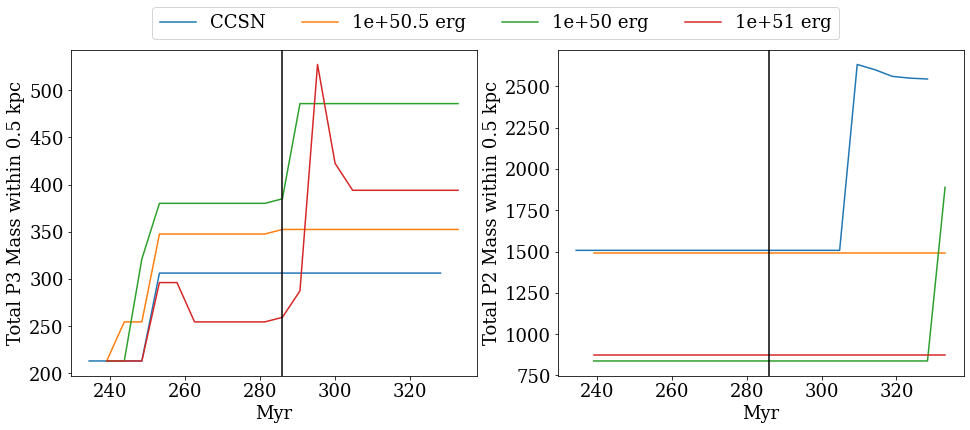

In [97]:
dist = 0.5 # kpc

fig, axs = plt.subplots(1, 2, figsize = (16, 6))
ax = axs.flat
for i, run_name in enumerate(vary_energy):
    
    if run_name != 'run_original':
            run_label = param_info[run_name]['energy'] + ' erg'
    else:
        run_label = 'CCSN'
        
    p3_mass = []
    p2_mass = []
    
    time = []
    
    for j, o in enumerate(sn_outputs[run_name]):
        time.append(DD_data[run_name][o]['time'])
        target_pos = np.array(star_info[run_name][o]['star_info']['chosen_star']['position'])
        
        p2_there = 'position' in star_info[run_name][o]['star_info']['P2'].keys()
        if p2_there == True:
            p2_pos = np.array(star_info[run_name][o]['star_info']['P2']['position']) 
            p2_masses = np.array(star_info[run_name][o]['star_info']['P2']['mass'])
            dr = np.sqrt(((p2_pos - target_pos)**2).sum(1))
            
            within_dist = np.argwhere(dr < dist).T[0]
            
            p2_mass.append(np.sum(p2_masses[within_dist]))
            
            
        else:
            p2_mass.append(0)
        
        if len(star_info[run_name][o]['star_info']['P3']['position']) > 0:
            p3_pos = np.array(star_info[run_name][o]['star_info']['P3']['position']) 
            p3_masses = np.array(star_info[run_name][o]['star_info']['P3']['mass'])
            dr = np.sqrt(((p3_pos - target_pos)**2).sum(1))
            
            within_dist = np.argwhere(dr < dist).T[0]
            
            p3_mass.append(np.sum(p3_masses[within_dist]))
        else:
            p3_mass.append(0)
            
    p3_mass = np.array(p3_mass)
    p2_mass = np.array(p2_mass)
    time = np.array(time)
    
    ax[0].plot(time, p3_mass)
    ax[1].plot(time, p2_mass, label = run_label)

ax[0].axvline(NSM_time['run_fiducial'], color = 'black')
ax[1].axvline(NSM_time['run_fiducial'], color = 'black')

ax[0].set_ylabel('Total P3 Mass within 0.5 kpc')
ax[0].set_xlabel('Myr')  

ax[1].set_ylabel('Total P2 Mass within 0.5 kpc')
ax[1].set_xlabel('Myr')

fig.legend(bbox_to_anchor=(0.8, 1), ncol = 4)

In [63]:
vary_time

['run_original', 'run_fiducial', 'run_A', 'run_B']

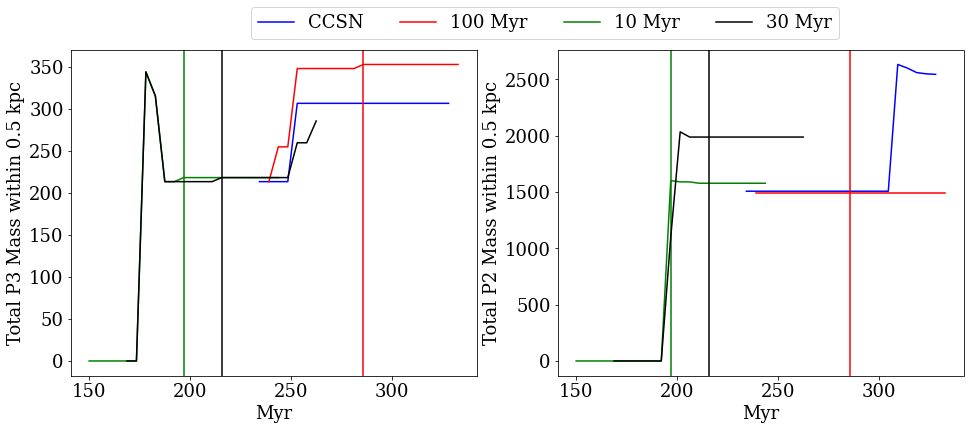

In [98]:
dist = 0.5 # kpc

fig, axs = plt.subplots(1, 2, figsize = (16, 6))
ax = axs.flat

colors = ['blue', 'red', 'green', 'black']

for i, run_name in enumerate(vary_time):
    
    if run_name != 'run_original':
            run_label = param_info[run_name]['delay_time'] + ' Myr'
    else:
        run_label = 'CCSN'
        
    p3_mass = []
    p2_mass = []
    
    time = []
    
    for j, o in enumerate(sn_outputs[run_name]):
        time.append(DD_data[run_name][o]['time'])
        target_pos = np.array(star_info[run_name][o]['star_info']['chosen_star']['position'])
        
        p2_there = 'position' in star_info[run_name][o]['star_info']['P2'].keys()
        if p2_there == True:
            p2_pos = np.array(star_info[run_name][o]['star_info']['P2']['position']) 
            p2_masses = np.array(star_info[run_name][o]['star_info']['P2']['mass'])
            dr = np.sqrt(((p2_pos - target_pos)**2).sum(1))
            
            within_dist = np.argwhere(dr < dist).T[0]
            
            p2_mass.append(np.sum(p2_masses[within_dist]))
            
            
        else:
            p2_mass.append(0)
        
        if len(star_info[run_name][o]['star_info']['P3']['position']) > 0:
            p3_pos = np.array(star_info[run_name][o]['star_info']['P3']['position']) 
            p3_masses = np.array(star_info[run_name][o]['star_info']['P3']['mass'])
            dr = np.sqrt(((p3_pos - target_pos)**2).sum(1))
            
            within_dist = np.argwhere(dr < dist).T[0]
            
            p3_mass.append(np.sum(p3_masses[within_dist]))
        else:
            p3_mass.append(0)
            
    p3_mass = np.array(p3_mass)
    p2_mass = np.array(p2_mass)
    time = np.array(time)
    
    ax[0].plot(time, p3_mass, c = colors[i])
    ax[1].plot(time, p2_mass, c = colors[i], label = run_label)
    if run_name != 'run_original':
        ax[1].axvline(NSM_time[run_name], c = colors[i])
        ax[0].axvline(NSM_time[run_name], c = colors[i])
        
ax[0].set_ylabel('Total P3 Mass within 0.5 kpc')
ax[0].set_xlabel('Myr')  

ax[1].set_ylabel('Total P2 Mass within 0.5 kpc')
ax[1].set_xlabel('Myr')

fig.legend(bbox_to_anchor=(0.8, 1), ncol = 4)

In [138]:
p3_sn = {}

for i, run_name in enumerate(star_info):
    p3_sn[run_name] = {}
    
    dead = []
    dead_time = []
    dead_mass = []
    dead_outs = []
    
    out = list(star_info[run_name].keys())
    for j, o in enumerate(star_info[run_name]): 
        target_pos = np.array(star_info[run_name][o]['star_info']['chosen_star']['position'])
        
        if len(star_info[run_name][o]['star_info']['P3']['position']) > 0:
            p3_pos = np.array(star_info[run_name][o]['star_info']['P3']['position']) 
            p3_masses = np.array(star_info[run_name][o]['star_info']['P3']['mass'])
            p3_ids = np.array(star_info[run_name][o]['star_info']['P3']['id'])
            dr = np.sqrt(((p3_pos - target_pos)**2).sum(1))
            
            within_dist = np.argwhere(dr < dist).T[0]
            
            within_p3_masses = p3_masses[within_dist]
            within_p3_ids = p3_ids[within_dist]
            
            dead_mask = within_p3_masses < 1e-1
            dead_p3s = within_p3_ids[dead_mask]
            dead_masses = within_p3_masses[dead_mask]
            
            for k, d in enumerate(dead_p3s):
                if d in dead:
                    pass
                else:
                    dead.append(d)
                    dead_time.append(DD_data[run_name][o]['time'])
                    dead_mass.append(dead_masses[k]*1e20)
                    dead_outs.append(o)
    
    p3_sn[run_name]['p3_mass'] = dead_mass
    p3_sn[run_name]['time'] = dead_time
    p3_sn[run_name]['outputs'] = dead_outs

Text(0, 0.5, 'Cumulative # of P3 SNe')

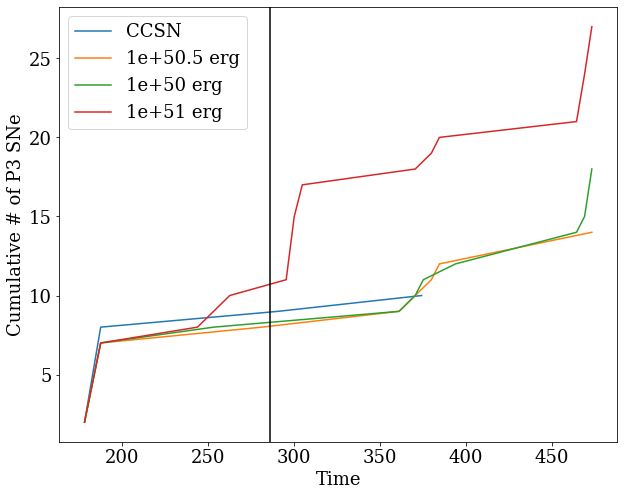

In [163]:
fig = plt.figure(figsize = (10,8))
for i, run_name in enumerate(vary_energy):
    if run_name != 'run_original':
            run_label = param_info[run_name]['energy'] + ' erg'
    else:
        run_label = 'CCSN'
    
    outs = p3_sn[run_name]['outputs']
    dead_time = p3_sn[run_name]['time']
    unique_time = np.unique(dead_time)
    unique_outs = np.unique(outs)
    num_super = []
    for out in unique_outs:
        where = np.argwhere(np.array(outs) == out)
        num_sn = len(np.array(p3_sn[run_name]['p3_mass'])[where])
        num_super.append(num_sn)

    #print(run_name)
    #print('---------')
    #for j, out in enumerate(unique_outs):
    #    print(f'There were {num_super[j]} P3 SNe in output # {out}.')
    
    #print('\n')
     
    plt.plot(unique_time, np.cumsum(num_super), label = run_label)

plt.axvline(NSM_time['run_fiducial'], color = 'black')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative # of P3 SNe')

Text(0, 0.5, 'Cumulative # of P3 SNe')

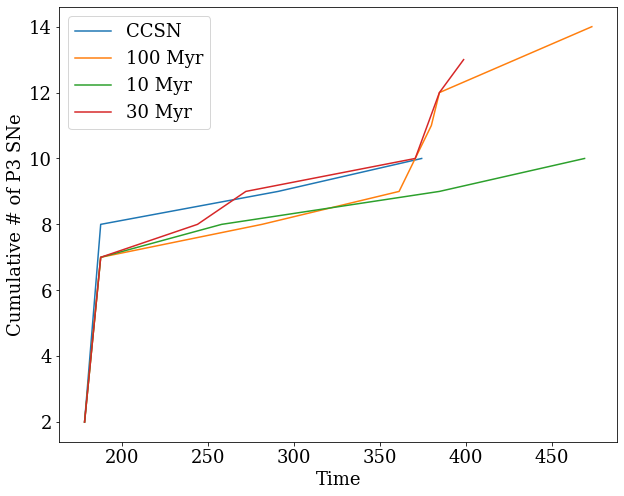

In [164]:
fig = plt.figure(figsize = (10,8))
for i, run_name in enumerate(vary_time):
    if run_name != 'run_original':
            run_label = param_info[run_name]['delay_time'] + ' Myr'
    else:
        run_label = 'CCSN'
    
    outs = p3_sn[run_name]['outputs']
    dead_time = p3_sn[run_name]['time']
    unique_time = np.unique(dead_time)
    unique_outs = np.unique(outs)
    num_super = []
    for out in unique_outs:
        where = np.argwhere(np.array(outs) == out)
        num_sn = len(np.array(p3_sn[run_name]['p3_mass'])[where])
        num_super.append(num_sn)

    #print(run_name)
    #print('---------')
    #for j, out in enumerate(unique_outs):
    #    print(f'There were {num_super[j]} P3 SNe in output # {out}.')
    
    #print('\n')
     
    plt.plot(unique_time, np.cumsum(num_super), label = run_label)

#plt.axvline(NSM_time['run_fiducial'], color = 'black')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative # of P3 SNe')

### Looking as gas_fraction

In [80]:
ds = yt.load('../run_A/DD0100/output_0100')

yt : [INFO     ] 2023-01-25 15:20:55,813 Parameters: current_time              = 88.44306507624
yt : [INFO     ] 2023-01-25 15:20:55,813 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-25 15:20:55,814 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-25 15:20:55,815 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-25 15:20:55,815 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-25 15:20:55,815 Parameters: current_redshift          = 10
yt : [INFO     ] 2023-01-25 15:20:55,815 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-25 15:20:55,816 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-25 15:20:55,816 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-25 15:20:55,816 Parameters: hubble_constant           = 0.6766


In [73]:
halo_pos = ds.arr(massive_prog['0060']['position'], 'unitary').to('kpc')
halo_rvir = ds.quan(massive_prog['0060']['rvir'], 'unitary').to('kpc')

NameError: name 'massive_prog' is not defined

yt : [INFO     ] 2023-01-25 15:25:08,424 Projection completed
yt : [INFO     ] 2023-01-25 15:25:08,424 xlim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:08,425 ylim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:08,425 xlim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:08,425 ylim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:08,427 Making a fixed resolution buffer of (('gas', 'gas_fraction')) 800 by 800



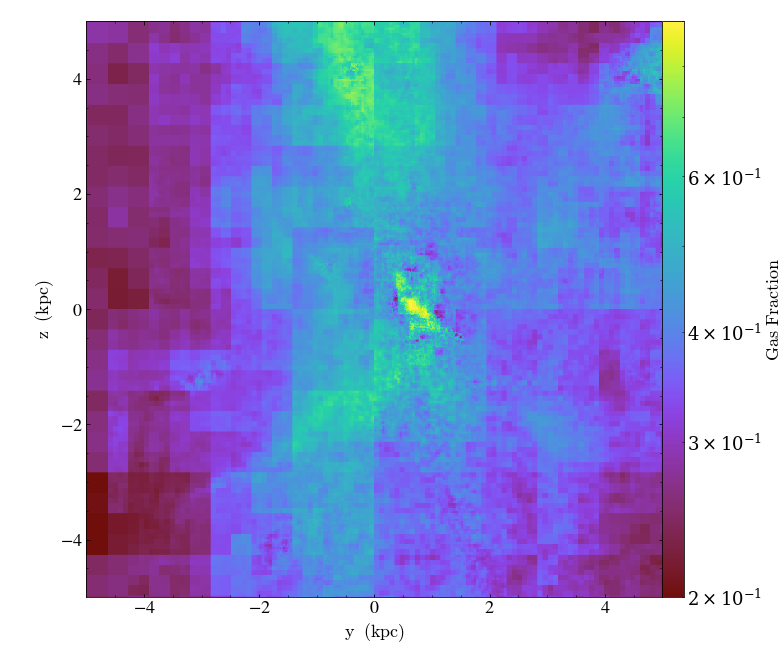

yt : [INFO     ] 2023-01-25 15:25:09,619 Projection completed
yt : [INFO     ] 2023-01-25 15:25:09,621 xlim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:09,621 ylim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:09,622 xlim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:09,623 ylim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:09,624 Making a fixed resolution buffer of (('gas', 'gas_fraction')) 800 by 800



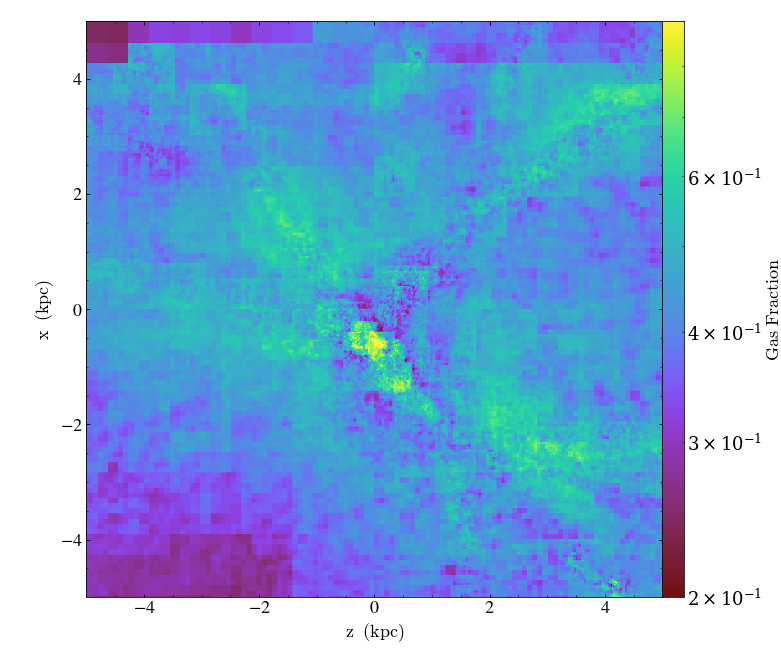

yt : [INFO     ] 2023-01-25 15:25:10,745 Projection completed
yt : [INFO     ] 2023-01-25 15:25:10,745 xlim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:10,746 ylim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:10,746 xlim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:10,747 ylim = 0.445000 0.555000
yt : [INFO     ] 2023-01-25 15:25:10,748 Making a fixed resolution buffer of (('gas', 'gas_fraction')) 800 by 800



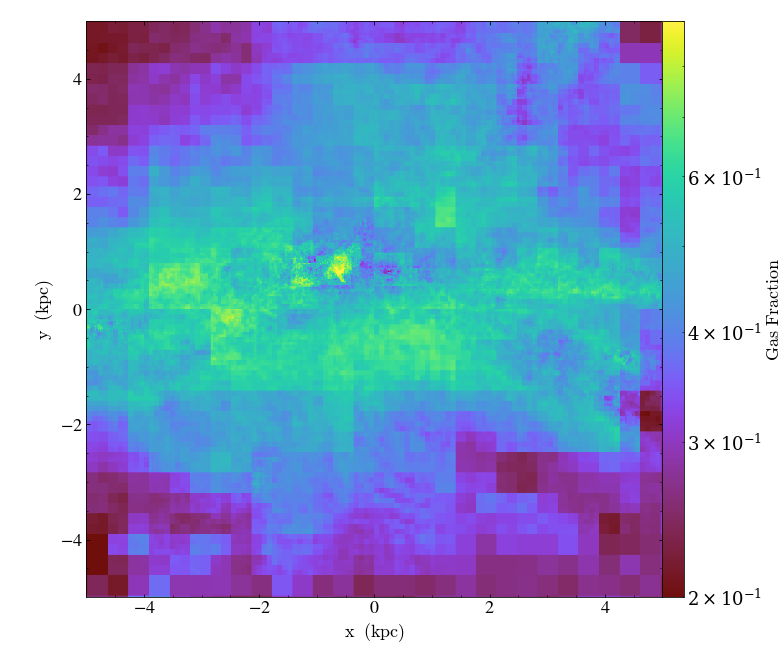

In [89]:
dims = 'xyz'
for dim in dims:
    prj = yt.ProjectionPlot(ds, dim, ('gas', 'gas_fraction'), center = 'c', width = (10, 'kpc'), weight_field = 'density')
#prj.annotate_quiver(("gas", "velocity_x"), ("gas", "velocity_y"))
    #prj.annotate_sphere(halo_pos, halo_rvir)
    prj.set_zlim(("gas", "gas_fraction"), 2e-1, 9e-1)
    prj.show()

In [71]:
dims = 'xyz'

vary_energy = ['run_original', 'run_fiducial', 'run_D', 'run_E']
vary_time = ['run_original', 'run_fiducial', 'run_A', 'run_B']

image_dir = 'images/'

for run_name in vary_time: 
    for dim in dims:
        path = f'{image_dir}{run_name}/no_limits/projection_gas_fraction_{dim}_*.png'

        print(f'./movie.sh {image_dir}{run_name}/no_limits/movies/projection_gas_fraction_{dim}.mov 5 {path}')
            

./movie.sh images/run_original/no_limits/movies/projection_gas_fraction_x.mov 5 images/run_original/no_limits/projection_gas_fraction_x_*.png
./movie.sh images/run_original/no_limits/movies/projection_gas_fraction_y.mov 5 images/run_original/no_limits/projection_gas_fraction_y_*.png
./movie.sh images/run_original/no_limits/movies/projection_gas_fraction_z.mov 5 images/run_original/no_limits/projection_gas_fraction_z_*.png
./movie.sh images/run_fiducial/no_limits/movies/projection_gas_fraction_x.mov 5 images/run_fiducial/no_limits/projection_gas_fraction_x_*.png
./movie.sh images/run_fiducial/no_limits/movies/projection_gas_fraction_y.mov 5 images/run_fiducial/no_limits/projection_gas_fraction_y_*.png
./movie.sh images/run_fiducial/no_limits/movies/projection_gas_fraction_z.mov 5 images/run_fiducial/no_limits/projection_gas_fraction_z_*.png
./movie.sh images/run_A/no_limits/movies/projection_gas_fraction_x.mov 5 images/run_A/no_limits/projection_gas_fraction_x_*.png
./movie.sh images/ru

In [58]:
## Testing 3a_massive_prog

data_dir = "../run_original/"

with open('DD_data_OG.json') as f:
    DD_data = json.load(f)

outputs = np.array(list(DD_data.keys()))
final_output = outputs[-1]

final_string = 'DD' + final_output + '/output_' + final_output

redshifts = []
for i, j in enumerate(DD_data):
    redshifts.append(DD_data[j][1])
redshifts = np.array(redshifts)

## Load in most recent dataset to find biggest halo

ds = yt.load(data_dir + final_string)
hds = yt.load(data_dir + 'rockstar_halos/halos_DD' + final_output + '.0.bin')

stars = ['p3', 'p2', 'p3_living']
for s in stars:
    ds.add_particle_filter(s)

ad = ds.all_data()
halos = hds.all_data()

yt : [INFO     ] 2023-01-25 15:02:44,635 Parameters: current_time              = 86.350132961854
yt : [INFO     ] 2023-01-25 15:02:44,635 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-01-25 15:02:44,636 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-25 15:02:44,637 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-25 15:02:44,637 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-25 15:02:44,637 Parameters: current_redshift          = 10.177129603224
yt : [INFO     ] 2023-01-25 15:02:44,637 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2023-01-25 15:02:44,637 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2023-01-25 15:02:44,638 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-01-25 15:02:44,638 Parameters: hubble_constant           = 0.6766
yt : [INFO     ] 2023-01-25 15:02:44,718 Parameters: current_time              = 1.4583692863819744e

TypeError: an integer is required

In [59]:
final_output

'0191'

In [68]:
hds = yt.load('../run_original/rockstar_halos/halos_DD0190.0.bin')

yt : [INFO     ] 2023-01-25 15:04:41,084 Parameters: current_time              = 1.4566808670277866e+16 s
yt : [INFO     ] 2023-01-25 15:04:41,085 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-01-25 15:04:41,086 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-25 15:04:41,087 Parameters: domain_right_edge         = [0.67659998 0.67659998 0.67659998]
yt : [INFO     ] 2023-01-25 15:04:41,087 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-25 15:04:41,088 Parameters: current_redshift          = 10.185769846430999
yt : [INFO     ] 2023-01-25 15:04:41,088 Parameters: omega_lambda              = 0.6888999938964844
yt : [INFO     ] 2023-01-25 15:04:41,088 Parameters: omega_matter              = 0.3111000061035156
yt : [INFO     ] 2023-01-25 15:04:41,088 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-01-25 15:04:41,089 Parameters: hubble_constant           = 0.6765999794006348


In [69]:
halos = hds.all_data()

yt : [INFO     ] 2023-01-25 15:04:44,379 Allocating for 6.840e+02 particles
Initializing refined index: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 19.76it/s]
/home/dskinner6/software/yt-conda/envs/yt_analysis/lib/python3.10/site-packages/yt/fields/field_detector.py:108: VisibleDeprecationWarning: The requested field name 'y' is ambiguous and corresponds to any one of the following field types:
 {'gas'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "y")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(*field)
/home/dskinner6/software/yt-conda/envs/yt_analysis/lib/python3.10/site-packages/yt/fields/field_detector.py:108: VisibleDeprecationWarning: The requested field name 'z' is ambiguous and corresponds to any one of the following field types:
 {'gas'}
Please 

In [65]:
ds.add_particle_filter('p3')

yt : [WARNING  ] 2023-01-25 15:04:11,635 The Derived Field ('io', 'particle_spherical_position_radius') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('io', 'particle_position_spherical_radius') instead.
yt : [WARNING  ] 2023-01-25 15:04:11,642 The Derived Field ('io', 'particle_spherical_position_theta') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('io', 'particle_position_spherical_theta') instead.
yt : [WARNING  ] 2023-01-25 15:04:11,643 The Derived Field ('io', 'particle_spherical_position_phi') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('io', 'particle_position_spherical_phi') instead.
yt : [WARNING  ] 2023-01-25 15:04:11,646 The Derived Field ('io', 'particle_spherical_velocity_radius') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('io', 'particle_velocity_spherical_radius') instead.
yt : [WARNING  ] 2023-01-25 15:04:11,650 The Derived Field ('io', 'particle_spherical_velocity_theta') i

yt : [WARNING  ] 2023-01-25 15:04:12,270 The Derived Field ('p3', 'particle_cylindrical_velocity_z') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('all', 'particle_velocity_cylindrical_z') instead.
yt : [WARNING  ] 2023-01-25 15:04:12,298 The Derived Field ('p3', 'particle_spherical_position_phi') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('all', 'particle_position_spherical_phi') instead.
yt : [WARNING  ] 2023-01-25 15:04:12,299 The Derived Field ('p3', 'particle_spherical_position_radius') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('all', 'particle_position_spherical_radius') instead.
yt : [WARNING  ] 2023-01-25 15:04:12,306 The Derived Field ('p3', 'particle_spherical_position_theta') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('all', 'particle_position_spherical_theta') instead.
yt : [WARNING  ] 2023-01-25 15:04:12,307 The Derived Field ('p3', 'particle_spherical_velocity_phi') is de

True

In [66]:
ad = ds.all_data()

In [67]:
ad['p3', 'particle_mass']

/home/dskinner6/software/yt-conda/envs/yt_analysis/lib/python3.10/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'particle_type' is ambiguous and corresponds to any one of the following field types:
 {'p3_living', 'p2', 'p3', 'nbody', 'all'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("p3", "particle_type")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
/home/dskinner6/software/yt-conda/envs/yt_analysis/lib/python3.10/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'particle_mass' is ambiguous and corresponds to any one of the following field types:
 {'p3_living', 'p2', 'p3', 'nbody', 'all'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("all", "particle_mass")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0


unyt_array([], dtype=float64, units='g')